# k-NN with Iris dataset

## Loading iris dataset from sklearn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
iris = datasets.load_iris()

print(iris.keys())
print(iris.target_names)
print(type(iris.data), type(iris.target))
print(iris.data.shape, iris.target.shape)

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])
['setosa' 'versicolor' 'virginica']
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(150, 4) (150,)


## k-NN fit and predict

In [2]:
X=iris.data
y=iris.target

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X,y)

print("6NN accuary score of Iris data:", knn.score(X,y))

X_new=np.array([[5.1, 3.5, 1.4, 0.2],[5.9, 3. , 5.1, 1.8]])
prediction = knn.predict(X_new)
print("Prediction for X_new is", prediction)

6NN accuary score of Iris data: 0.9866666666666667
Prediction for X_new is [0 2]


## Measuring model performance

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.24,random_state=21)
print("Shapes of train and test sets:", X_train.shape,X_test.shape)

knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("Predicted labels: ", y_pred[:])
print("Ground truth    : ", y_test[:])

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

print("6NN accuary score of the test set:", knn.score(X_test,y_test))
print("6NN accuary score of the train set:", knn.score(X_train,y_train))

Shapes of train and test sets: (114, 4) (36, 4)
Predicted labels:  [1 0 0 0 1 1 0 2 0 0 1 1 2 2 0 2 1 1 0 2 2 1 2 1 0 1 0 0 1 2 0 2 1 0 2 1]
Ground truth    :  [1 0 0 0 1 1 0 2 0 0 1 1 2 2 0 1 2 1 0 2 2 1 1 1 0 1 0 0 1 2 0 2 1 0 2 1]
0.9166666666666666
6NN accuary score of the test set: 0.9166666666666666
6NN accuary score of the train set: 0.9824561403508771


## Confusion matrix and Classification report

In [4]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(knn.score(X_test,y_test))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9166666666666666
[[13  0  0]
 [ 0 12  2]
 [ 0  1  8]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        13
          1       0.92      0.86      0.89        14
          2       0.80      0.89      0.84         9

avg / total       0.92      0.92      0.92        36



## Model complexity and over/underfitting

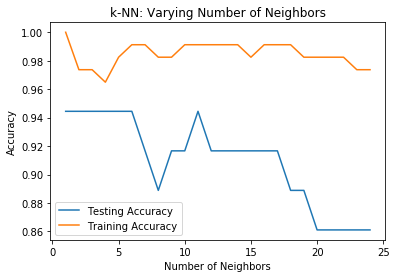

In [5]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 25)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit the classifier to the training data
    knn.fit(X_train,y_train)
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train,y_train)
    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


## GridSearchCV 

In [6]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': np.arange(1, 25)}
knn = KNeighborsClassifier()

knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X_train, y_train)

print(knn_cv.best_params_)
print(knn_cv.score(X_train,y_train))
print(knn_cv.score(X_test,y_test))

{'n_neighbors': 5}
0.9824561403508771
0.9444444444444444
